In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import boutdata
from boututils.options import BOUTOptions
from boutdata.collect import create_cache

# onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
# sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
# sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
# sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))
sys.path.append(r"/ssd_scratch/scripts/sdtools")

# import sdtools.general.plotstyle
from hermes3.utils import *

from hermes3.fluxes import *

from hermes3.load import *
from hermes3.case_db import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
import xbout

%load_ext autoreload
%autoreload 2

In [3]:
casepath = r"/ssd_scratch/hcases/xpoint_heat/xph1-base_master"
loadfilepath = os.path.join(casepath, "BOUT.dmp.*.nc")
inputfilepath = os.path.join(casepath, "BOUT.inp")
squashfilepath = os.path.join(casepath, "BOUT.squash.nc") # Squashoutput hardcoded to this filename

ds = xbout.load.open_boutdataset(
                        datapath = loadfilepath, 
                        inputfilepath = inputfilepath, 
                        keep_xboundaries=True,
                        keep_yboundaries=True,
                        )

print()

Read in:
<xbout.BoutDataset>
Contains:
<xarray.Dataset>
Dimensions:               (x: 20, y: 58, t: 1060, z: 1)
Coordinates:
    dx                    (x, y) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    dy                    (x, y) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    dz                    (x, y) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
  * t                     (t) float64 3.532e+06 3.532e+06 ... 7.59e+06 7.595e+06
  * x                     (x) int64 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18 19
  * y                     (y) float64 0.1571 0.4712 0.7854 ... 17.44 17.75 18.06
  * z                     (z) float64 3.142
Data variables: (12/113)
    Bxy                   (x, y) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    Dnnd                  (t, x, y, z) float64 dask.array<chunksize=(1060, 20, 7, 1), meta=np.ndarray>
    Ed+_iz                (t, x, y, z) float64 dask.array<chunksize=(1060, 20, 7, 1), meta=np.ndarray>
    Ed

/ssd_scratch/scripts/xBOUT/xbout/load.py:349: UserWarning: No geometry type found, no physical coordinates will be added
  warn("No geometry type found, no physical coordinates will be added")


In [5]:
nsep.values

array([], shape=(0, 1), dtype=float64)

In [7]:
len(nsep)

1058

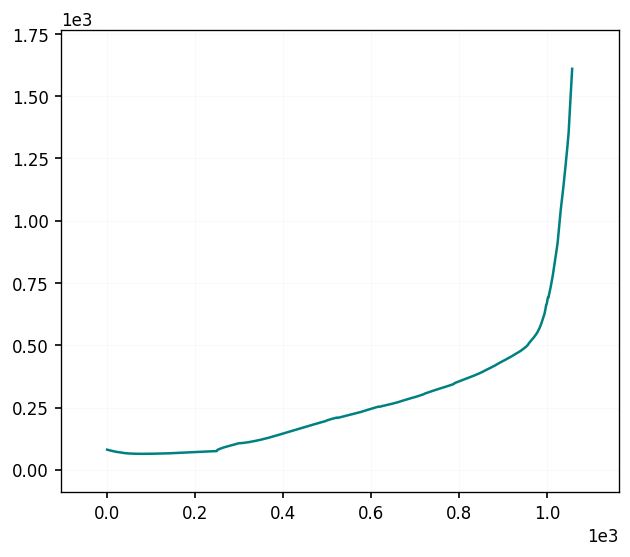

In [9]:
omp = int((ds.metadata["jyseps2_2"] - ds.metadata["jyseps1_2"])/2 + ds.metadata["jyseps1_2"])
nsep = ds["Ne"].isel(y = omp, x=ds.metadata["ixseps1"], t = slice(None,-2))

fig, ax = plt.subplots()
ax.plot(range(len(nsep)),nsep)


In [4]:
create?

Signature:
create(
    averagelast=1,
    final=-1,
    path='data',
    output='./',
    informat='nc',
    outformat=None,
)
Docstring:
Create restart files from data (dmp) files.

Parameters
----------
averagelast : int, optional
    Number of time points (counting from `final`, inclusive) to
    average over (default is 1 i.e. just take last time-point)
final : int, optional
    The last time point to use (default is last, -1)
path : str, optional
    Path to original restart files (default: "data")
output : str, optional
    Path to write new restart files (default: current directory)
informat : str, optional
    File extension of original files (default: "nc")
outformat : str, optional
    File extension of new files (default: use the same as `informat`)
File:      /ssd_scratch/anaconda3/lib/python3.9/site-packages/boutdata/restart.py
Type:      function

In [2]:
from boutdata.restart import create

create(
    final = 400,
    path = r"/ssd_scratch/hcases/xpoint_heat/xph1-base_master",
    output = r"/ssd_scratch/hcases/xpoint_heat/xph1-base_master_restart"
    
)

('Number of data files: ', 10)
('/ssd_scratch/hcases/xpoint_heat/xph1-base_master/BOUT.dmp.0.nc', ' -> ', '/ssd_scratch/hcases/xpoint_heat/xph1-base_master_restart/BOUT.restart.0.nc')
('hist_hi = ', 100)
('tt = ', 4299850.0)
('NXPE = ', BoutArray(1, dtype=int32), ' NYPE = ', BoutArray(10, dtype=int32))
(' -> ', 'Dnnd')
(20, 9, 1)
(' -> ', 'Ed+_iz')
(20, 9, 1)
(' -> ', 'Ed+_rec')
(20, 9, 1)
(' -> ', 'Ed_pump')
(20, 9, 1)
(' -> ', 'Ed_target_recycle')
(20, 9, 1)
(' -> ', 'Ed_target_refl')
(20, 9, 1)
(' -> ', 'Ed_wall_recycle')
(20, 9, 1)
(' -> ', 'Ed_wall_refl')
(20, 9, 1)
(' -> ', 'Edd+_cx')
(20, 9, 1)
(' -> ', 'EnergyFlow_d+_xlow')
(20, 9, 1)
(' -> ', 'EnergyFlow_d+_ylow')
(20, 9, 1)
(' -> ', 'EnergyFlow_e_xlow')
(20, 9, 1)
(' -> ', 'EnergyFlow_e_ylow')
(20, 9, 1)
(' -> ', 'Fd+_iz')
(20, 9, 1)
(' -> ', 'Fd+_rec')
(20, 9, 1)
(' -> ', 'Fdd+_cx')
(20, 9, 1)
(' -> ', 'Kd+d+_coll')
(20, 9, 1)
(' -> ', 'Kd+e_coll')
(20, 9, 1)
(' -> ', 'Kdd+_cx')
(20, 9, 1)
(' -> ', 'Ked+_coll')
(20, 9, 1)
('